In [ ]:
#1. Data Collection: Expand Dataset with Multiple Shakespeare Plays

import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

# Load multiple Shakespeare texts from Gutenberg
plays = [
    'shakespeare-hamlet.txt',
    'shakespeare-macbeth.txt',
    'shakespeare-caesar.txt'
]

# Combine the raw texts for a larger dataset
combined_text = ""
for play in plays:
    combined_text += gutenberg.raw(play).lower() + "\n"

# Save combined data to file
with open('shakespeare_combined.txt', 'w', encoding='utf-8') as file:
    file.write(combined_text)


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\wajid\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
# Data Preprocessing & Sequence Creation

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Read combined data
with open('shakespeare_combined.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Split paragraphs/sentences
sentences = [sent for sent in text.split('\n') if sent.strip()]

# Create n-gram sequences
input_sequences = []
for line in sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_seq = token_list[:i+1]
        input_sequences.append(ngram_seq)

# Pad sequences
max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split predictors and labels
x = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Model Building with Regularization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential([
    Embedding(total_words, 100, input_length=max_seq_len-1),
    Bidirectional(LSTM(150, return_sequences=True)),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Training with History Capture
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - accuracy: 0.0321 - loss: 7.0376 - val_accuracy: 0.0303 - val_loss: 6.7942
Epoch 2/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 33s 90ms/step - accuracy: 0.0405 - loss: 6.6304 - val_accuracy: 0.0444 - val_loss: 6.7308
Epoch 3/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.0472 - loss: 6.4737 - val_accuracy: 0.0443 - val_loss: 6.7227
Epoch 4/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.0491 - loss: 6.3796 - val_accuracy: 0.0465 - val_loss: 6.7350
Epoch 5/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.0550 - loss: 6.2864 - val_accuracy: 0.0535 - val_loss: 6.7413
Epoch 6/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.0648 - loss: 6.1760 - val_accuracy: 0.0613 - val_loss: 6.7261
Epoch 7/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 33s 90ms/step - accuracy: 0.0725 - loss: 6.0688 - val_accuracy: 0.0676 - val_loss: 6.7269
Epoch 8/30
368/368 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.0794 - loss: 5.9655 - 

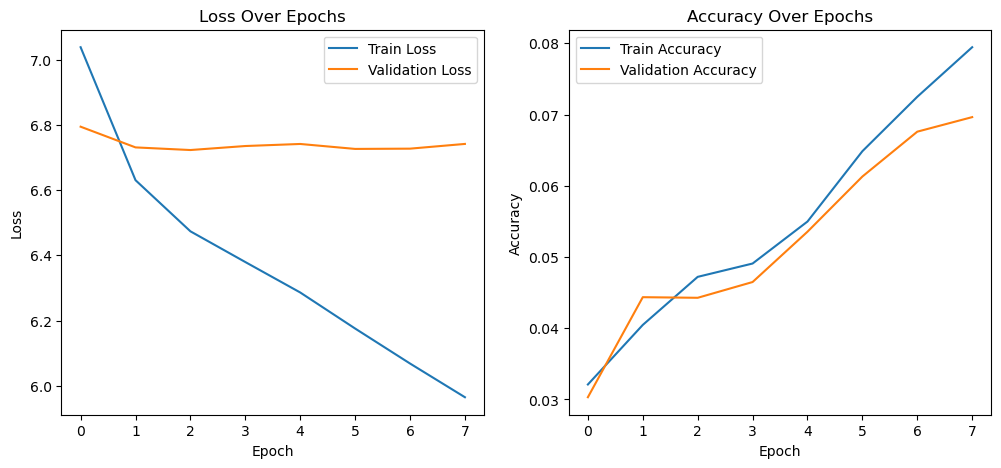

In [ ]:
# Plot Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


In [ ]:
#  Predict Next Word Function (same as before)

def predict_next_word(model, tokenizer, text, max_seq_len):
    text = text.lower().strip()
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')

    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)

    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None


In [72]:
# Sample Usage
input_text = "and then it started, like a guilty thing vpon"
print(f"Input text: {input_text}")
next_word = predict_next_word(model, tokenizer, input_text, max_seq_len)
print(f"Next Word Prediction: {next_word}")


Input text: and then it started, like a guilty thing vpon
Next Word Prediction: the


In [69]:
#Save the model 
model.save('next_word_lstm.h5')

#save the tokenizer
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle,protocol=pickle.HIGHEST_PROTOCOL)